In [0]:
from sklearn import datasets, linear_model
import numpy as np
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (15, 5)  

In [12]:
x = np.array([[14, 52, 27, 25],
     [9, 49, 9, 33],
     [19, 56, 29, 18],
     [5, 37, 23, 19],
     [11, 35, 23, 12],
     [14, 67, 26, 34],
     [5, 47, 26, 15],
     [4, 29, 35, 32],
     [8, 45, 24, 20],
     [16, 51, 21, 19],
     [21, 57, 14, 8],
     [2, 56, 15, 13]])
y = np.array([141, 118, 148, 129, 90, 74, 152, 157, 92, 174, 113, 130])
x = np.insert(x, 0, 1, axis=1)
x          

array([[ 1, 14, 52, 27, 25],
       [ 1,  9, 49,  9, 33],
       [ 1, 19, 56, 29, 18],
       [ 1,  5, 37, 23, 19],
       [ 1, 11, 35, 23, 12],
       [ 1, 14, 67, 26, 34],
       [ 1,  5, 47, 26, 15],
       [ 1,  4, 29, 35, 32],
       [ 1,  8, 45, 24, 20],
       [ 1, 16, 51, 21, 19],
       [ 1, 21, 57, 14,  8],
       [ 1,  2, 56, 15, 13]])

Градиентный спуск

In [0]:
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
h = 10**(-5)
e = 10**(-3)
rss = []

In [0]:
def grad_w():
    return 2*sum(np.array([x[i]*(sum(w*x[i]) - y[i]) for i in range(len(x))]))
def func():
    return w - h*grad_w()

In [10]:
rss.append(sum(np.array([sum(w*x[i]) - y[i] for i in range(len(x))])**2))
while abs(np.array([w[0]]) - np.array([func()[0]])) > e:
    w = func()
    rss.append(sum(np.array([sum(w*x[i]) - y[i] for i in range(len(x))])**2))
w, rss[-1]

(array([0.1322368 , 0.49982176, 1.53152703, 1.0261436 , 0.71652574]),
 12687.194377701535)

Text(0.5, 1.0, 'Градиентный спуск')

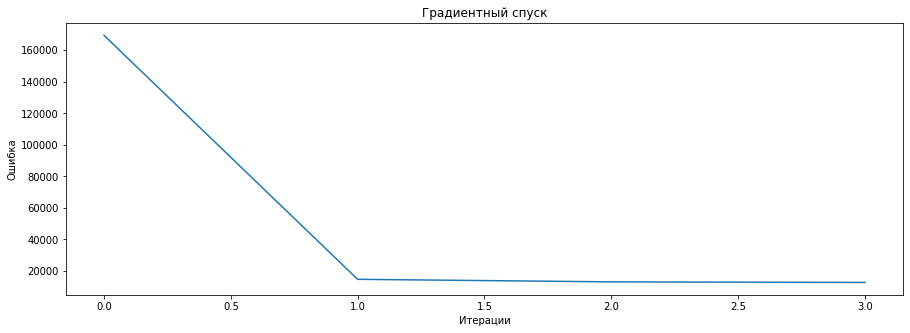

In [11]:
plt.plot(range(len(rss)), rss)

plt.xlabel('Итерации')
plt.ylabel('Ошибка')
plt.title('Градиентный спуск')

Стохастический спуск

In [0]:
rss2 = []
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
h = 10**(-5)
e = 10**(-5)
i = 0

In [0]:
def st_grad_w():
    return 2*(x[i]*(sum(w*x[i]) - y[i]))
def st_func():
    return w - h*st_grad_w()

In [0]:
rss2.append(sum(np.array([sum(w*x[i]) - y[i] for i in range(len(x))])**2))
while abs(np.array([w[0]]) - np.array([st_func()[0]])) > e:
    w = st_func()
    rss2.append(sum(np.array([sum(w*x[i]) - y[i] for i in range(len(x))])**2))
    i = np.random.randint(0, len(x))
w, rss2[-1]

(array([0.13086694, 0.3855845 , 1.56469248, 0.75391885, 0.66200858]),
 18725.138376795283)

Text(0.5, 1.0, 'Стохастический спуск')

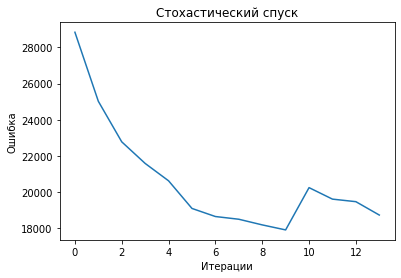

In [0]:
plt.plot(range(len(rss2)-20), rss2[20:])

plt.xlabel('Итерации')
plt.ylabel('Ошибка')
plt.title('Стохастический спуск')

Для градиентного проверка ответов

In [0]:
[0.13588121*x[i][0] + 0.43022869*x[i][1] + 1.65738797*x[i][2] + 0.94837637*x[i][3] + 0.78127653*x[i][4] for i in range(len(x))]

[137.48133255000002,
 119.53746276999999,
 142.68984491,
 100.26729013,
 94.06495061999999,
 168.42526450000003,
 116.56119282,
 108.11506901,
 116.54673286000002,
 126.30648456000002,
 123.16927941,
 118.19230534999998]

In [0]:
[141, 118, 148, 129, 90, 74, 152, 157, 92, 174, 113, 130]

[141, 118, 148, 129, 90, 74, 152, 157, 92, 174, 113, 130]

In [0]:
0.13588121, 0.43022869, 1.65738797, 0.94837637, 0.78127653

(0.13588121, 0.43022869, 1.65738797, 0.94837637, 0.78127653)

Для стохастического проверка ответов

In [0]:
[0.13779889*x[i][0] + 0.4286775*x[i][1] + 1.61181366*x[i][2] + 1.0311657*x[i][3] + 0.78030502*x[i][4] for i in range(len(x))]

[137.30269360999998,
 118.00532269,
 142.49353201,
 100.46089829,
 94.34720082999999,
 167.47147799,
 116.55131191,
 109.65566517,
 116.45291079,
 125.67941062999999,
 121.69216497000001,
 116.86816961]

Аналитическая попытка

In [0]:
w = np.array([0.1, 0.1, 0.1, 0.1, 0.1])
h = 10**(-5)
e = 10**(-5)

In [0]:
w = np.dot(np.linalg.pinv(x), y)
w

array([ 1.35429889e+02,  7.84680223e-02, -4.46681195e-01,  9.00410776e-01,
       -4.13679582e-01])

Для аналитического проверка ответов

In [0]:
[1.35429889e+02*x[i][0] + 7.84680223e-02*x[i][2] + -4.46681195e-01*x[i][2] + 9.00410776e-01*x[i][3] + -4.13679582e-01*x[i][4] for i in range(len(x))]


[130.2519054216,
 111.8397143157,
 133.4756313568,
 134.65553740010003,
 138.2877208195,
 120.10518081710002,
 135.3293563291,
 143.0283375277,
 132.1965632125,
 127.69973143029999,
 123.7380523641,
 122.93827840279998]

In [0]:
x = np.array([[14, 52, 27, 25],
     [9, 49, 9, 33],
     [19, 56, 29, 18],
     [5, 37, 23, 19],
     [11, 35, 23, 12],
     [14, 67, 26, 34],
     [5, 47, 26, 15],
     [4, 29, 35, 32],
     [8, 45, 24, 20],
     [16, 51, 21, 19],
     [21, 57, 14, 8],
     [2, 56, 15, 13]])
y = np.array([141, 118, 148, 129, 90, 74, 152, 157, 92, 174, 113, 130])

In [0]:
x_feature0 = np.array(list(map(lambda x: x[0], x))) [:, np.newaxis]
x_feature1 = np.array(list(map(lambda x: x[1], x))) [:, np.newaxis]
x_feature2 = np.array(list(map(lambda x: x[2], x))) [:, np.newaxis]
x_feature3 = np.array(list(map(lambda x: x[3], x))) [:, np.newaxis]

In [0]:
column_X0= np.linspace(x_feature0.min(), x_feature0.max(),12)
column_X1 = np.linspace(x_feature1.min(), x_feature1.max(),12)
column_X2= np.linspace(x_feature2.min(), x_feature2.max(),12)
column_X3 = np.linspace(x_feature3.min(), x_feature3.max(),12)
X_ = np.stack((column_X0, column_X1, column_X2, column_X3), axis=1)
X_

array([[ 2.        , 29.        ,  9.        ,  8.        ],
       [ 3.72727273, 32.45454545, 11.36363636, 10.36363636],
       [ 5.45454545, 35.90909091, 13.72727273, 12.72727273],
       [ 7.18181818, 39.36363636, 16.09090909, 15.09090909],
       [ 8.90909091, 42.81818182, 18.45454545, 17.45454545],
       [10.63636364, 46.27272727, 20.81818182, 19.81818182],
       [12.36363636, 49.72727273, 23.18181818, 22.18181818],
       [14.09090909, 53.18181818, 25.54545455, 24.54545455],
       [15.81818182, 56.63636364, 27.90909091, 26.90909091],
       [17.54545455, 60.09090909, 30.27272727, 29.27272727],
       [19.27272727, 63.54545455, 32.63636364, 31.63636364],
       [21.        , 67.        , 35.        , 34.        ]])

In [0]:
lr = linear_model.LinearRegression()
lr.fit(x, y)
Y_predict = lr.predict(X_)

In [0]:
lr.coef_

array([ 0.07846802, -0.4466812 ,  0.90041078, -0.41367958])

In [0]:
lr.intercept_ 

135.42988942407646

In [0]:
lr.score(x,y)

0.0914779955263817